# 

In [254]:
#importing the rquired librraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA # arima function for model building
from pmdarima import auto_arima # from auto_arima we will et order of p, d, q


In [253]:
!pip install pmdarima

In [6]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

In [190]:
df=pd.read_csv("exchange_rate.csv")

In [194]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


# Data Processing

In [198]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [202]:
df['date']=pd.to_datetime(df['date'],format="mixed")

In [206]:
df['date']

0      1990-01-01
1      1990-02-01
2      1990-03-01
3      1990-04-01
4      1990-05-01
          ...    
7583   2010-06-10
7584   2010-07-10
7585   2010-08-10
7586   2010-09-10
7587   2010-10-10
Name: date, Length: 7588, dtype: datetime64[ns]

In [210]:
df['date'].dt.year

0       1990
1       1990
2       1990
3       1990
4       1990
        ... 
7583    2010
7584    2010
7585    2010
7586    2010
7587    2010
Name: date, Length: 7588, dtype: int32

In [214]:
df['date'].dt.month

0        1
1        2
2        3
3        4
4        5
        ..
7583     6
7584     7
7585     8
7586     9
7587    10
Name: date, Length: 7588, dtype: int32

In [218]:
df['date'].dt.day

0        1
1        1
2        1
3        1
4        1
        ..
7583    10
7584    10
7585    10
7586    10
7587    10
Name: date, Length: 7588, dtype: int32

In [224]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df

,date,Ex_rate,year,month,day
0,1990-01-01,0.785500,1990,1,1
1,1990-02-01,0.781800,1990,2,1
2,1990-03-01,0.786700,1990,3,1
3,1990-04-01,0.786000,1990,4,1
4,1990-05-01,0.784900,1990,5,1
...,...,...,...,...,...
7583,2010-06-10,0.718494,2010,6,10
7584,2010-07-10,0.721839,2010,7,10
7585,2010-08-10,0.723197,2010,8,10
7586,2010-09-10,0.720825,2010,9,10


# data Processing and visulaization

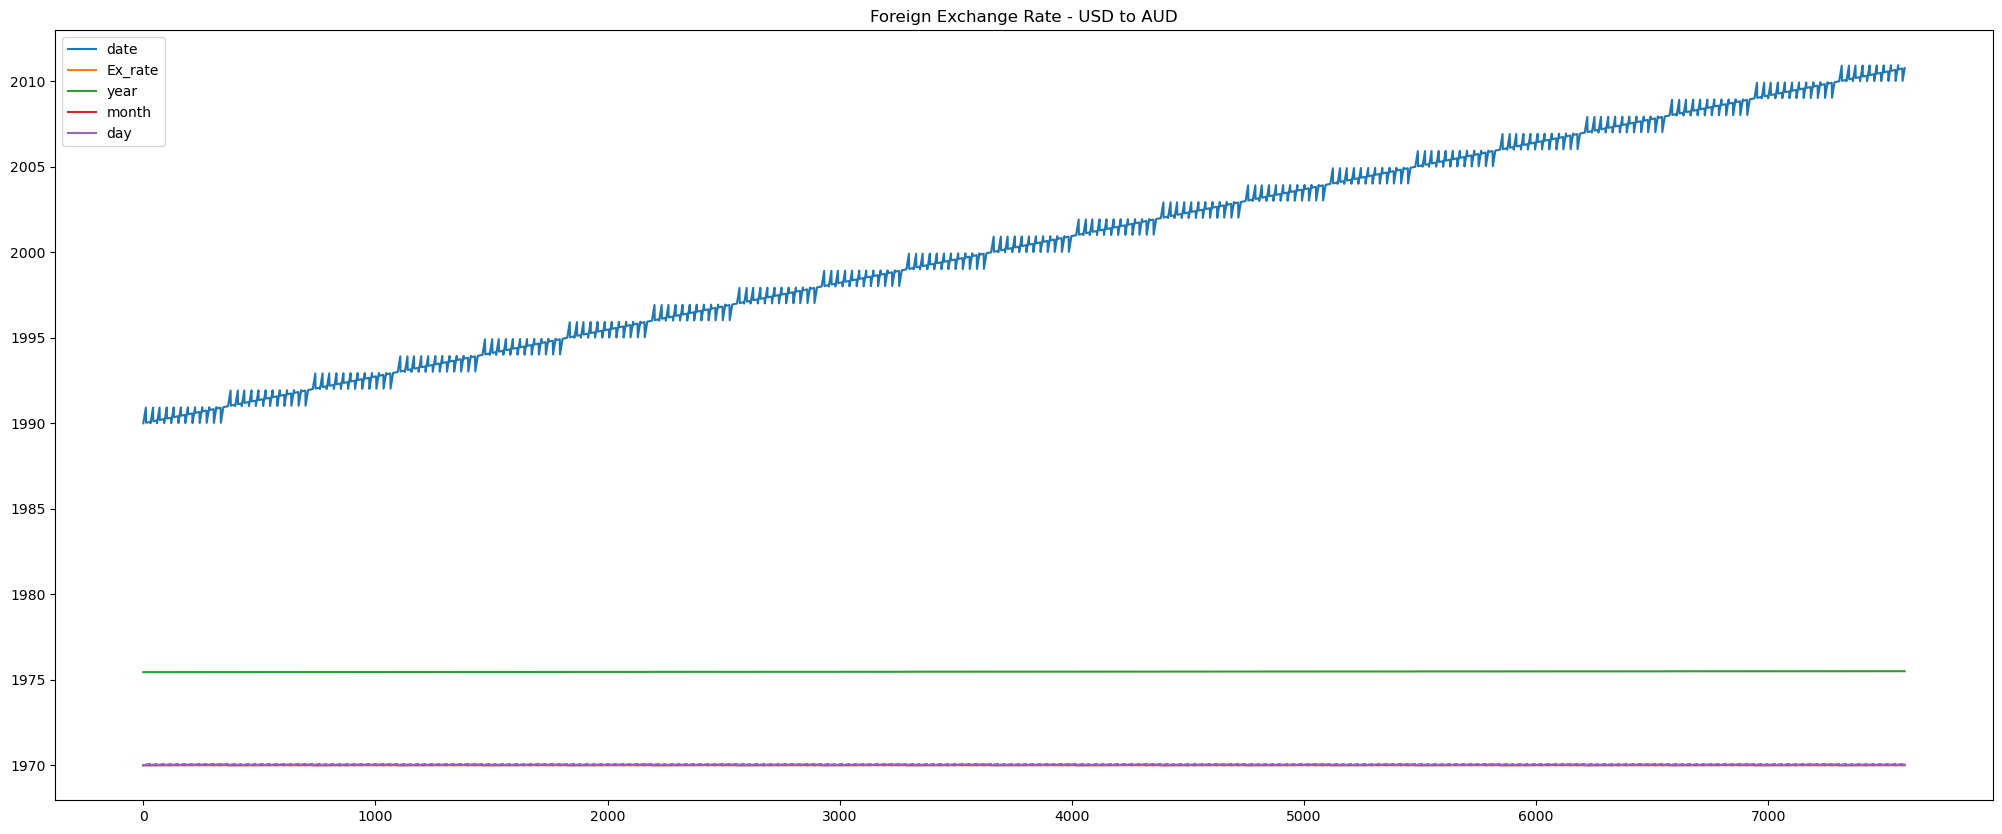

In [249]:
df.plot(figsize = (25,10))
plt.title('Foreign Exchange Rate - USD to AUD')
plt.savefig('Foreign Exchange Rate - USD to AUD.png')
plt.show()

In [259]:
adfuller(df['Ex_rate'])[1] # returns p value at index 1

0.44923273535979974

# ARIMA model building


In [268]:
order = auto_arima(df['Ex_rate'])

In [270]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [273]:
df.shape

(7588, 5)

In [325]:
#split the date
train=df.iloc[:-500]
test=df.iloc[-500:]

In [327]:
train.shape

(7088, 5)

In [329]:
train

,date,Ex_rate,year,month,day
0,1990-01-01,0.785500,1990,1,1
1,1990-02-01,0.781800,1990,2,1
2,1990-03-01,0.786700,1990,3,1
3,1990-04-01,0.786000,1990,4,1
4,1990-05-01,0.784900,1990,5,1
...,...,...,...,...,...
7083,2009-05-24,0.737110,2009,5,24
7084,2009-05-25,0.737110,2009,5,25
7085,2009-05-26,0.738525,2009,5,26
7086,2009-05-27,0.733192,2009,5,27


In [331]:
test.shape

(500, 5)

In [333]:
test

,date,Ex_rate,year,month,day
7088,2009-05-29,0.734592,2009,5,29
7089,2009-05-30,0.733272,2009,5,30
7090,2009-05-31,0.731904,2009,5,31
7091,2009-01-06,0.731904,2009,1,6
7092,2009-02-06,0.720747,2009,2,6
...,...,...,...,...,...
7583,2010-06-10,0.718494,2010,6,10
7584,2010-07-10,0.721839,2010,7,10
7585,2010-08-10,0.723197,2010,8,10
7586,2010-09-10,0.720825,2010,9,10


In [335]:
# Arima Model

In [337]:
model=ARIMA(train['Ex_rate'],order=(1,1,0)).fit()


# Evaluating the model

In [339]:
test

,date,Ex_rate,year,month,day
7088,2009-05-29,0.734592,2009,5,29
7089,2009-05-30,0.733272,2009,5,30
7090,2009-05-31,0.731904,2009,5,31
7091,2009-01-06,0.731904,2009,1,6
7092,2009-02-06,0.720747,2009,2,6
...,...,...,...,...,...
7583,2010-06-10,0.718494,2010,6,10
7584,2010-07-10,0.721839,2010,7,10
7585,2010-08-10,0.723197,2010,8,10
7586,2010-09-10,0.720825,2010,9,10


In [341]:
train

,date,Ex_rate,year,month,day
0,1990-01-01,0.785500,1990,1,1
1,1990-02-01,0.781800,1990,2,1
2,1990-03-01,0.786700,1990,3,1
3,1990-04-01,0.786000,1990,4,1
4,1990-05-01,0.784900,1990,5,1
...,...,...,...,...,...
7083,2009-05-24,0.737110,2009,5,24
7084,2009-05-25,0.737110,2009,5,25
7085,2009-05-26,0.738525,2009,5,26
7086,2009-05-27,0.733192,2009,5,27


In [355]:
ypred=model.predict(start=7088, end=7580)
ypred


7088    0.734756
7089    0.734788
7090    0.734784
7091    0.734785
7092    0.734785
          ...   
7576    0.734785
7577    0.734785
7578    0.734785
7579    0.734785
7580    0.734785
Name: predicted_mean, Length: 493, dtype: float64

In [361]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7088
Model:                 ARIMA(1, 1, 0)   Log Likelihood               26101.832
Date:                Tue, 03 Sep 2024   AIC                         -52199.664
Time:                        12:04:05   BIC                         -52185.932
Sample:                             0   HQIC                        -52194.935
                               - 7088                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1333      0.002    -63.441      0.000      -0.137      -0.129
sigma2      3.702e-05   1.05e-07    351.122      0.000    3.68e-05    3.72e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2709238.40
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.04   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""